In [1]:
# Importing libraries

import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Data Collection

Data is obtained from all road traffic accidents recorded in the Seattle municipal area
between Jan 2004–Aug 2020 by the Seattle Department of Transport (SDOT).

Data is available in Seattle Open Data portal and saved as CSV.

URL: http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0

In [2]:
# Read the Data
df = pd.read_csv("C://Users/ManojKumar Chalamala/Downloads/Collisions.csv")
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,1,327920,329420,3856094,Matched,Intersection,34911.0,17TH AVE SW AND SW ROXBURY ST,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.361405,47.702064,2,46200,46200,1791736,Matched,Block,NaN,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,...,Wet,Dusk,NaN,5101020.0,NaN,13,From same direction - both going straight - bo...,0,0,N
2,-122.317414,47.664028,3,1212,1212,3507861,Matched,Block,NaN,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,30,From opposite direction - all others,0,0,N
3,-122.318234,47.619927,4,327909,329409,EA03026,Matched,Intersection,29054.0,11TH AVE E AND E JOHN ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,0,Vehicle going straight hits pedestrian,0,0,N
4,-122.351724,47.560306,5,104900,104900,2671936,Matched,Block,NaN,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,...,Ice,Dark - Street Lights On,NaN,9359012.0,Y,50,Fixed object,0,0,N


# Exploratory Data Analysis

In [3]:
# Dimensions of the Dataframe

df_shape = df.shape
print("Dimensions of the data frame: "+str(df_shape))

Dimensions of the data frame: (221738, 40)


In [4]:
# Type of Data in Dataframe

df.dtypes

X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

In [5]:
# Information about the Dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221738 entries, 0 to 221737
Data columns (total 40 columns):
X                  214260 non-null float64
Y                  214260 non-null float64
OBJECTID           221738 non-null int64
INCKEY             221738 non-null int64
COLDETKEY          221738 non-null int64
REPORTNO           221738 non-null object
STATUS             221738 non-null object
ADDRTYPE           218024 non-null object
INTKEY             72027 non-null float64
LOCATION           217145 non-null object
EXCEPTRSNCODE      101335 non-null object
EXCEPTRSNDESC      11785 non-null object
SEVERITYCODE       221737 non-null object
SEVERITYDESC       221738 non-null object
COLLISIONTYPE      195287 non-null object
PERSONCOUNT        221738 non-null int64
PEDCOUNT           221738 non-null int64
PEDCYLCOUNT        221738 non-null int64
VEHCOUNT           221738 non-null int64
INJURIES           221738 non-null int64
SERIOUSINJURIES    221738 non-null int64
FATALITIES     

In [6]:
# Explore the Statistical features of data

df.describe().T.style.background_gradient(cmap='Set2',axis=0)

,count,mean,std,min,25%,50%,75%,max
X,214260,-122.331,0.0300583,-122.419,-122.349,-122.33,-122.312,-122.239
Y,214260,47.6202,0.056059,47.4956,47.5771,47.616,47.6643,47.7341
OBJECTID,221738,110870,64010.4,1,55435.2,110870,166304,221738
INCKEY,221738,145007,89372.4,1001,71721.2,127358,210119,334276
COLDETKEY,221738,145237,89749.6,1001,71721.2,127358,210339,335776
INTKEY,72027,37637,52000.8,23807,28653,29973,33984,764413
PERSONCOUNT,221738,2.22674,1.4697,0,2,2,3,93
PEDCOUNT,221738,0.0380945,0.201704,0,0,0,0,6
PEDCYLCOUNT,221738,0.0273521,0.164512,0,0,0,0,2
VEHCOUNT,221738,1.72944,0.830529,0,2,2,2,15


In [7]:
# Check for any null values in the Dataframe

df.isnull().sum(axis=0)

X                    7478
Y                    7478
OBJECTID                0
INCKEY                  0
COLDETKEY               0
REPORTNO                0
STATUS                  0
ADDRTYPE             3714
INTKEY             149711
LOCATION             4593
EXCEPTRSNCODE      120403
EXCEPTRSNDESC      209953
SEVERITYCODE            1
SEVERITYDESC            0
COLLISIONTYPE       26451
PERSONCOUNT             0
PEDCOUNT                0
PEDCYLCOUNT             0
VEHCOUNT                0
INJURIES                0
SERIOUSINJURIES         0
FATALITIES              0
INCDATE                 0
INCDTTM                 0
JUNCTIONTYPE        11979
SDOT_COLCODE            1
SDOT_COLDESC            1
INATTENTIONIND     191550
UNDERINFL           26431
WEATHER             26641
ROADCOND            26560
LIGHTCOND           26730
PEDROWNOTGRNT      216543
SDOTCOLNUM          94533
SPEEDING           211802
ST_COLCODE           9413
ST_COLDESC          26451
SEGLANEKEY              0
CROSSWALKKEY

# Data Cleaning

# Remove the data with unknown information in the Target variable

The predefined target variable in the data deteremines the Car Accident Severity. However there are few rows in the dataframe with 'SEVERITYCODE = 0' which means an accident with "Unknown" Severity. We cannot use these accident data with unknown information to predict the Car Accident severity. So these rows should be dropped.

In [8]:
# Identify the rows with SeverityDESC = Unknown
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    137776
Injury Collision                   58842
Unknown                            21657
Serious Injury Collision            3111
Fatality Collision                   352
Name: SEVERITYDESC, dtype: int64

In [9]:
# Remove the Unknown Accident Severity rows
Unknown = df['SEVERITYDESC'] == 'Unknown'
df.drop(df.index[Unknown], inplace=True)

# Reset index of the data frame
df.reset_index(inplace=True)

# Relabel the Target Variable 

The Target Variable "SEVERITYCODE" is having values (0, 1, 2, 2b, 3). It contains categorical values. So this has to be converted into numerical format. We have already dropped the rows with code value "0". So we are left with (1, 2, 2b, 3)

Relebel the codes from (1, 2, 2b, 3) to (1, 2, 3, 4).

In [10]:
# Values before Converison
print(df["SEVERITYCODE"].value_counts())

# Convert the target variable value from (1. 2, 2b, 3) to (1, 2, 3, 4) by changing 2b to 3 and 3 to 4

for i in range(0,len(df["SEVERITYCODE"])):
    if df["SEVERITYDESC"][i] == 'Serious Injury Collision':
        df["SEVERITYCODE"][i] = 3
    if df["SEVERITYDESC"][i] == 'Fatality Collision':
        df["SEVERITYCODE"][i] = 4
        
# Converted values        
df["SEVERITYCODE"].value_counts()

1     137776
2      58842
2b      3111
3        352
Name: SEVERITYCODE, dtype: int64


C:\Users\ManojKumar Chalamala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ManojKumar Chalamala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


1    137776
2     58842
3      3111
4       352
Name: SEVERITYCODE, dtype: int64

# Remove Columns with unnecessary information

In [11]:
df = df.drop(['OBJECTID','INCKEY','LOCATION','COLDETKEY','REPORTNO','STATUS','INTKEY','EXCEPTRSNCODE',
              'EXCEPTRSNDESC','SEVERITYDESC','INCDATE','SDOT_COLCODE','SDOT_COLDESC','SDOTCOLNUM','ST_COLCODE',
              'ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','INCDTTM'],axis=1)
df.columns

Index(['index', 'X', 'Y', 'ADDRTYPE', 'SEVERITYCODE', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'JUNCTIONTYPE', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
       'SPEEDING', 'HITPARKEDCAR'],
      dtype='object')

# Finding missing values and handling them

In [12]:
def missing_function(df):
    missing_data = df.isnull()
    missing_data.head()

    for column in missing_data.columns.values.tolist():
        print(column)
        print(missing_data[column].value_counts())
        print(df[column].value_counts())
        print("")
        
missing_function(df)

index
False    200081
Name: index, dtype: int64
2047      1
208079    1
191735    1
189686    1
195829    1
         ..
188937    1
190984    1
170502    1
164357    1
0         1
Name: index, Length: 200081, dtype: int64

X
False    194672
True       5409
Name: X, dtype: int64
-122.332653    269
-122.344896    263
-122.328079    262
-122.344997    248
-122.299160    236
              ... 
-122.298305      1
-122.357075      1
-122.389188      1
-122.360755      1
-122.403378      1
Name: X, Length: 24033, dtype: int64

Y
False    194672
True       5409
Name: Y, dtype: int64
47.708655    269
47.717173    263
47.604161    262
47.725036    248
47.579673    236
            ... 
47.644114      1
47.693902      1
47.594138      1
47.680666      1
47.690589      1
Name: Y, Length: 24033, dtype: int64

ADDRTYPE
False    198148
True       1933
Name: ADDRTYPE, dtype: int64
Block           129852
Intersection     67532
Alley              764
Name: ADDRTYPE, dtype: int64

SEVERITYCODE
False    20

In [13]:
df.replace(r'^\s*$', np.nan, regex=True)
df.replace("Unknown", np.nan, inplace = True)
df.replace("Other", np.nan, inplace = True)

#removing columns with more than 20% values missing (INATTENTIONIND,PEDROWNOTGRNT,SPEEDING)
df = df.drop(["INATTENTIONIND","PEDROWNOTGRNT","SPEEDING"],axis=1)

#removing rows for columns with less than 20% values missing (X, Y,COLLISIONTYPE,JUNCTIONTYPE,
                                                            #UNDERINFL,WEATHER,ROADCOND,LIGHTCOND)
df.dropna(subset=["X","Y","COLLISIONTYPE","JUNCTIONTYPE","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND"], 
          axis=0, inplace=True)

#making sure all missing values are handled with
print(df.info())
missing_function(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148171 entries, 0 to 200080
Data columns (total 19 columns):
index              148171 non-null int64
X                  148171 non-null float64
Y                  148171 non-null float64
ADDRTYPE           148171 non-null object
SEVERITYCODE       148171 non-null object
COLLISIONTYPE      148171 non-null object
PERSONCOUNT        148171 non-null int64
PEDCOUNT           148171 non-null int64
PEDCYLCOUNT        148171 non-null int64
VEHCOUNT           148171 non-null int64
INJURIES           148171 non-null int64
SERIOUSINJURIES    148171 non-null int64
FATALITIES         148171 non-null int64
JUNCTIONTYPE       148171 non-null object
UNDERINFL          148171 non-null object
WEATHER            148171 non-null object
ROADCOND           148171 non-null object
LIGHTCOND          148171 non-null object
HITPARKEDCAR       148171 non-null object
dtypes: float64(2), int64(8), object(9)
memory usage: 22.6+ MB
None
index
False    148171
Name: i

# Data Visualization

In [14]:
import pip
!pip install folium


In [15]:
import folium

longitude = df["X"].mean()
latitude = df["Y"].mean()

folium.Map(location=[latitude, longitude], zoom_start=11)

In [16]:
df.isnull().sum(axis=0)

index              0
X                  0
Y                  0
ADDRTYPE           0
SEVERITYCODE       0
COLLISIONTYPE      0
PERSONCOUNT        0
PEDCOUNT           0
PEDCYLCOUNT        0
VEHCOUNT           0
INJURIES           0
SERIOUSINJURIES    0
FATALITIES         0
JUNCTIONTYPE       0
UNDERINFL          0
WEATHER            0
ROADCOND           0
LIGHTCOND          0
HITPARKEDCAR       0
dtype: int64

In [17]:
MyData = df
MyData.head()

,index,X,Y,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,0,-122.356511,47.517361,Intersection,1,Angles,2,0,0,2,0,0,0,At Intersection (intersection related),N,Clear,Dry,Daylight,N
1,1,-122.361405,47.702064,Block,1,Rear Ended,2,0,0,2,0,0,0,Mid-Block (not related to intersection),0,Raining,Wet,Dusk,N
2,2,-122.317414,47.664028,Block,2,Head On,2,0,0,2,1,0,0,Mid-Block (not related to intersection),N,Clear,Dry,Dark - Street Lights On,N
3,3,-122.318234,47.619927,Intersection,2,Pedestrian,3,1,0,1,1,0,0,At Intersection (intersection related),N,Raining,Wet,Dark - Street Lights On,N
5,5,-122.333067,47.544302,Block,1,Rear Ended,2,0,0,2,0,0,0,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N


# Histograms

In [18]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter

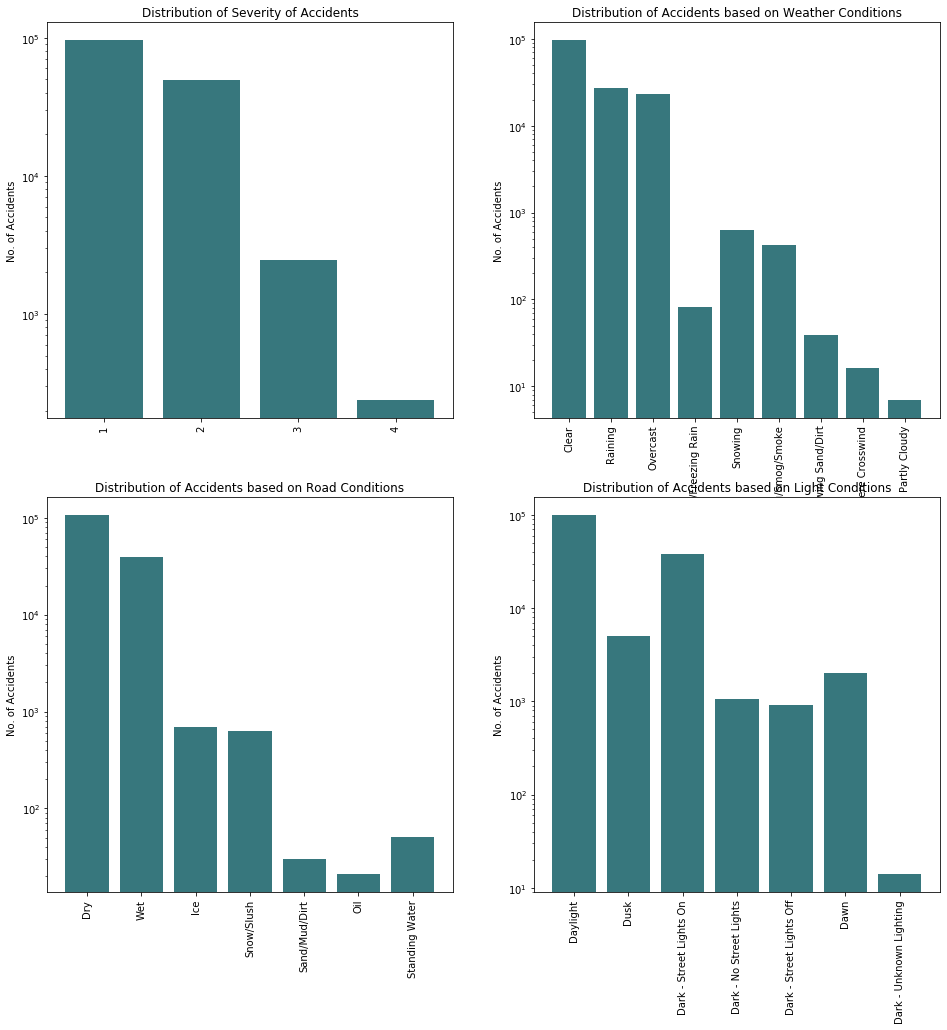

In [19]:
plt.rcParams["figure.figsize"] = (16,16)
plt.subplot(2,2,1)
freqs = Counter(MyData["SEVERITYCODE"])
xvals = range(len(freqs.values()))
plt.title("Distribution of Severity of Accidents")
plt.ylabel("No. of Accidents")
#plt.xlabel("Accident Severity")
plt.bar(xvals, freqs.values(), color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')
plt.yscale('log')



plt.subplot(2,2,2)
freqs = Counter(MyData["WEATHER"])
xvals = range(len(freqs.values()))
plt.title("Distribution of Accidents based on Weather Conditions")
plt.ylabel("No. of Accidents")
#plt.xlabel("Weather Conditions")
plt.bar(xvals, freqs.values(), color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')
plt.yscale('log')



plt.subplot(2,2,3)
freqs = Counter(MyData["ROADCOND"])
xvals = range(len(freqs.values()))
plt.title("Distribution of Accidents based on Road Conditions")
plt.ylabel("No. of Accidents")
#plt.xlabel("Road Conditions")
plt.bar(xvals, freqs.values(), color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')
plt.yscale('log')



plt.subplot(2,2,4)
freqs = Counter(MyData["LIGHTCOND"])
xvals = range(len(freqs.values()))
plt.title("Distribution of Accidents based on Light Conditions")
plt.ylabel("No. of Accidents")
#plt.xlabel("Light Conditions")
plt.bar(xvals, freqs.values(), color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')
plt.yscale('log')

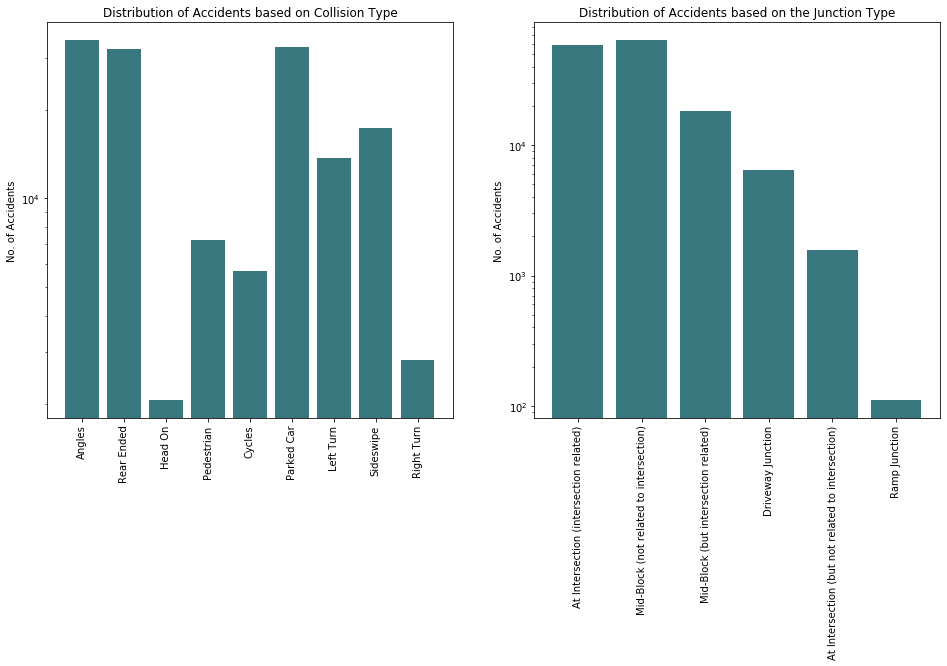

In [20]:
plt.subplot(2,2,1)
freqs = Counter(MyData["COLLISIONTYPE"])
xvals = range(len(freqs.values()))
plt.title("Distribution of Accidents based on Collision Type")
plt.ylabel("No. of Accidents")
plt.bar(xvals, freqs.values(), color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')
plt.yscale('log')



plt.subplot(2,2,2)
freqs = Counter(MyData["JUNCTIONTYPE"])
xvals = range(len(freqs.values()))
plt.title("Distribution of Accidents based on the Junction Type")
plt.ylabel("No. of Accidents")
plt.bar(xvals, freqs.values(), color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')
plt.yscale('log')


# Balancing the DataSet

In [21]:
MyData['SEVERITYCODE'].value_counts()

1    95913
2    49569
3     2449
4      240
Name: SEVERITYCODE, dtype: int64

In [22]:
# MyData['UNDERINFL'] = MyData['UNDERINFL'].replace(['0'],'N')
MyData['UNDERINFL'] = MyData['UNDERINFL'].replace(['1'],'Y')

In [23]:
MyData['SEVERITYCODE'] = [1 if b=="1" else 0 for b in MyData.SEVERITYCODE]

MyData['SEVERITYCODE'].value_counts()

1    95913
0    52258
Name: SEVERITYCODE, dtype: int64

In [24]:
# shuffling and creating a balanced dataset
MyData= MyData.sample(frac=1,random_state=0,replace=False)

# 1 - Put all severity code 2 class in a separate dataset.
df_scode2 = MyData.loc[MyData['SEVERITYCODE'] == 0]

# 2 - Randomly select 58188 observations from the severity code 1(majority class)
df_scode1 = MyData.loc[MyData['SEVERITYCODE'] == 1].sample(n=52258,random_state=42)

# 3 - concatenating datasets to get balanced dataset
MyData_balanced = pd.concat([df_scode1,df_scode2])
MyData_balanced = MyData_balanced.sample(frac=1,random_state=0,replace=False)

#checking if dataset balanced
print(MyData_balanced['SEVERITYCODE'].value_counts())
MyData_balanced.info()

1    52258
0    52258
Name: SEVERITYCODE, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 104516 entries, 5226 to 134636
Data columns (total 19 columns):
index              104516 non-null int64
X                  104516 non-null float64
Y                  104516 non-null float64
ADDRTYPE           104516 non-null object
SEVERITYCODE       104516 non-null int64
COLLISIONTYPE      104516 non-null object
PERSONCOUNT        104516 non-null int64
PEDCOUNT           104516 non-null int64
PEDCYLCOUNT        104516 non-null int64
VEHCOUNT           104516 non-null int64
INJURIES           104516 non-null int64
SERIOUSINJURIES    104516 non-null int64
FATALITIES         104516 non-null int64
JUNCTIONTYPE       104516 non-null object
UNDERINFL          104516 non-null object
WEATHER            104516 non-null object
ROADCOND           104516 non-null object
LIGHTCOND          104516 non-null object
HITPARKEDCAR       104516 non-null object
dtypes: float64(2), int64(9), object(8)


# Encoding Categorical columns and creating dummies

In [25]:

Feature = MyData_balanced.iloc[:,1:]

#Encoding Categorical Features - Training Dataset
Feature = pd.get_dummies(data=Feature, columns=['ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','WEATHER',
                                                            'ROADCOND','LIGHTCOND','UNDERINFL','HITPARKEDCAR'])


del Feature["SEVERITYCODE"]



In [26]:
Feature.isnull().sum(axis=0)

X                                                                 0
Y                                                                 0
PERSONCOUNT                                                       0
PEDCOUNT                                                          0
PEDCYLCOUNT                                                       0
VEHCOUNT                                                          0
INJURIES                                                          0
SERIOUSINJURIES                                                   0
FATALITIES                                                        0
ADDRTYPE_Block                                                    0
ADDRTYPE_Intersection                                             0
COLLISIONTYPE_Angles                                              0
COLLISIONTYPE_Cycles                                              0
COLLISIONTYPE_Head On                                             0
COLLISIONTYPE_Left Turn                         

# Correlation Matrix

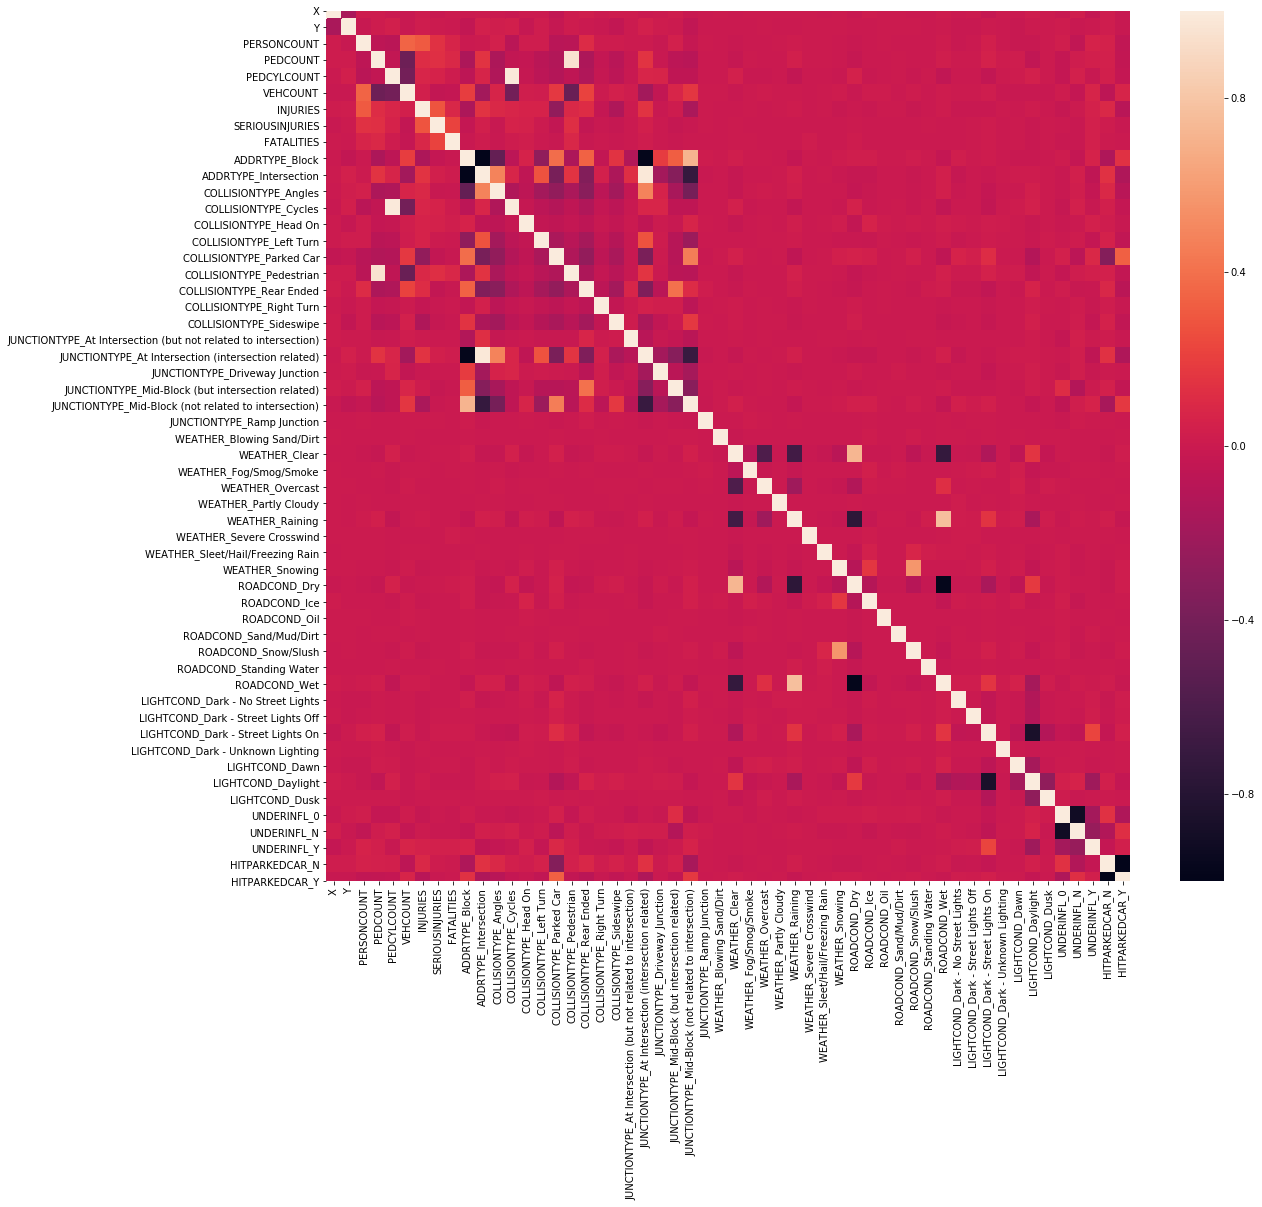

In [27]:
plt.rcParams["figure.figsize"] = (18,16)
corr = Feature.corr()
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

# Normalizing and Feature Scaling

In [28]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(Feature).transform(Feature)

#Binarise SEVERITY code
Y = MyData_balanced["SEVERITYCODE"]

# Split Train and Test Set

In [29]:
# We split X and Y into train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (73161, 54) (73161,)
Test set: (31355, 54) (31355,)


# Classification:

# Decision Tree 

In [30]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
DT_model.fit(X_train,Y_train)


#Prediction
DT_yhat = DT_model.predict(X_test)

#Model evaluation
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix

print("Accuracy of Decision Tree model:")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, DT_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, DT_yhat))
print("Jaccard index: %.2f" % jaccard_similarity_score(Y_test, DT_yhat))
print("F1-score: %.2f" % f1_score(Y_test, DT_yhat, average='weighted') )
print("R2-score: %.2f" % r2_score(DT_yhat , Y_test) )
print(classification_report(Y_test, DT_yhat))

Accuracy of Decision Tree model:
Train set Accuracy:  1.0
Test set Accuracy:  1.0
Jaccard index: 1.00
F1-score: 1.00
R2-score: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15609
           1       1.00      1.00      1.00     15746

    accuracy                           1.00     31355
   macro avg       1.00      1.00      1.00     31355
weighted avg       1.00      1.00      1.00     31355



C:\Users\ManojKumar Chalamala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
    
rf = RandomForestClassifier()
params = {'n_estimators':[50,75,100],
          'criterion':['gini', 'entropy'], 
          'random_state':[0]}
rf1 = GridSearchCV(rf, param_grid=params)
rf1.fit(X_train,Y_train)
rf_predictions = rf1.predict(X_test)
print('Best Hyperparameter RFT : ',rf1.best_params_)

#Confusion Matrix
rf_cm=confusion_matrix(Y_test,rf_predictions)
print(rf_cm,'\n')

#Classification Report
rf_cr = classification_report(Y_test,rf_predictions)
print(rf_cr,'\n')

#Accuracy
acc = accuracy_score(Y_test,rf_predictions)
print(acc,'\n')

C:\Users\ManojKumar Chalamala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyperparameter RFT :  {'criterion': 'gini', 'n_estimators': 75, 'random_state': 0}
[[15600     9]
 [    0 15746]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15609
           1       1.00      1.00      1.00     15746

    accuracy                           1.00     31355
   macro avg       1.00      1.00      1.00     31355
weighted avg       1.00      1.00      1.00     31355
 

0.9997129644394833 



# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,Y_train)


LR_yhat = LR_model.predict(X_test)

#Model evaluation
print("Accuracy of Logistic Regression model:")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, LR_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, LR_yhat))
print("Jaccard index: %.2f" % jaccard_similarity_score(Y_test, LR_yhat))
print("F1-score: %.2f" % f1_score(Y_test, LR_yhat, average='weighted') )
print("R2-score: %.2f" % r2_score(LR_yhat , Y_test) )
print(classification_report(Y_test, LR_yhat))

C:\Users\ManojKumar Chalamala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Logistic Regression model:
Train set Accuracy:  0.9999863315154249
Test set Accuracy:  0.9998724286397703
Jaccard index: 1.00
F1-score: 1.00
R2-score: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15609
           1       1.00      1.00      1.00     15746

    accuracy                           1.00     31355
   macro avg       1.00      1.00      1.00     31355
weighted avg       1.00      1.00      1.00     31355



C:\Users\ManojKumar Chalamala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


# Support Vector Machine

In [33]:
from sklearn import svm
SVM_model = svm.SVC(kernel='linear')
SVM_model.fit(X_train, Y_train)

SVM_yhat = SVM_model.predict(X_test)

#Model evaluation
print("Accuracy of SVM model:")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, SVM_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, SVM_yhat))
print("Jaccard index: %.2f" % jaccard_similarity_score(Y_test, SVM_yhat))
print("F1-score: %.2f" % f1_score(Y_test, SVM_yhat, average='weighted') )
print("R2-score: %.2f" % r2_score(SVM_yhat , Y_test) )
print(classification_report(Y_test, SVM_yhat))

Accuracy of SVM model:
Train set Accuracy:  1.0
Test set Accuracy:  1.0
Jaccard index: 1.00
F1-score: 1.00
R2-score: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15609
           1       1.00      1.00      1.00     15746

    accuracy                           1.00     31355
   macro avg       1.00      1.00      1.00     31355
weighted avg       1.00      1.00      1.00     31355



C:\Users\ManojKumar Chalamala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


# Conclusion:

The accuracy of the classifiers is excellent, i.e. 100%. This means that the model has trained well and fits the training data and performs well on the testing set as well as the training set. We can conclude that this model can accurately predict the severity of car accidents in Seattle.
